# Comparison of QAOA CVaR (Max Cut)
In this notebook the QAOA method using the Conditional Value at risk (CVaR) is compared to the stadard QAOA for a max cut problem. 
# Importing necessary modules

In [1]:
from qaoa import QAOA, problems, mixers, initialstates

In [2]:
import numpy as np
import networkx as nx
import sys                     
sys.path.append('../')         
from plotroutines import *

# Creating problem instance
Data for graph generation is found at https://github.com/OpenQuantumComputing/data

Barabási–Albert graph instance

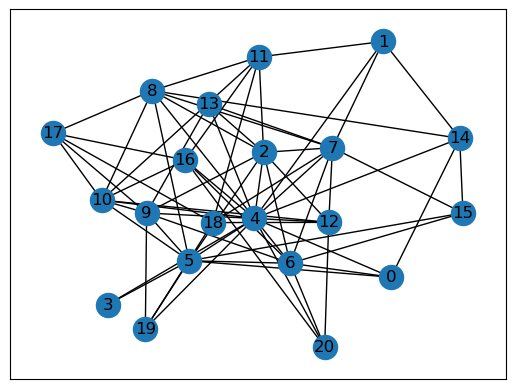

In [3]:
numV = 21  # Number of vertices
G = nx.read_gml("../../../data/sample_graphs/w_ba_n" + str(numV) + "_k4_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos=pos)

# Creating QAOA instances 

In [4]:
qaoa_CVaR = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X(),
    alpha=0.1,
)
qaoa = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X()
)

# Minimum cost is precalculated

In [5]:
mincost = -25.23404480588015

# Sampling cost landscape for all methods
Evaluating the QAOA circuit with uniformly sampled angles for gamma and beta

2023-09-22 12:49:25 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0
2023-09-22 12:49:25 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 12:49:25 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 12:49:25 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 12:50:09 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 12:50:09 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 12:50:09 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0
2023-09-22 12:50:09 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 12:50:09 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-22 1

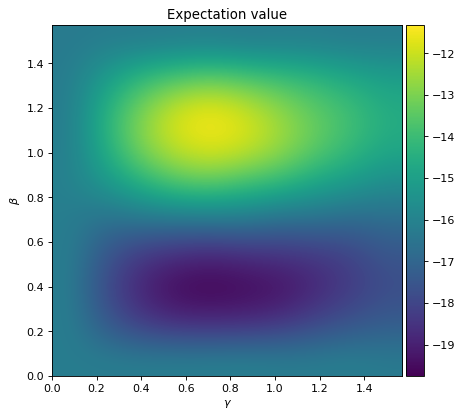

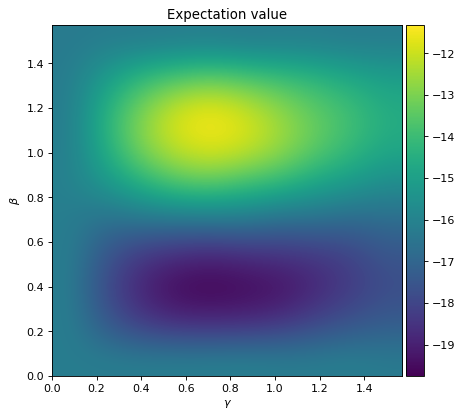

In [7]:
qaoa.sample_cost_landscape( angles={"gamma": [0, np.pi/2, 10], "beta": [0, np.pi/2, 10]} )
plot_E(qaoa)
qaoa_CVaR.sample_cost_landscape( angles={"gamma": [0, np.pi/2, 10], "beta": [0, np.pi/2, 10]} )
plot_E(qaoa_CVaR)

# Plotting cost landscape, for both QAOA instances

Below the cost landscape of both the standard QAOA method and the CVaR method is shown. They are seen to be relatively similar, but with some differences as is expected since the cost value is calculated differently for the two methods.

# Increasing depth

In [ ]:
qaoamc.optimize(depth=5)
qaoamc_CVaR.optimize(depth=5)

# Plotting the approximation ratio

Below the approximation ratio is plotted for both methods. The CVaR method clearly outperforms the standard QAOA method.

In [ ]:
pl.hlines(1, 1, maxdepth, linestyles="solid", colors="black")
pl.plot(
    np.arange(1, maxdepth + 1),
    np.array(list(qaoamc.costval.values())) / mincost,
    "o--",
    label="QAOA",
)
pl.plot(
    np.arange(1, maxdepth + 1),
    np.array(list(qaoamc_CVaR.costval.values())) / mincost,
    "o--",
    label="QAOA with CVaR",
)
pl.ylim(0.5, 1.05)
_ = pl.ylabel("appr. ratio")
_ = pl.xlabel("depth")
_ = pl.legend()